In [1]:
import pandas as pd
from libs.libs import evaluation, backward_selection, create_polynomial
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Load dataset

In [2]:
# Load dataset
data_dir = "dataset/heart.csv"
dataset = pd.read_csv(data_dir)

# Ensure data types
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_features = ["exang", "fbs", "sex", "cp", "restecg", "slope", "ca", "thal"]
response = "target"

# Split train test

In [3]:
# Train-test split
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42, stratify=dataset[response])

# Predictors-response split
y_train = train_set[response]
x_train = train_set.drop([response], axis=1)

#test_set = pd.DataFrame(test_set.values, columns=test_set.columns)
y_test = test_set[response]
x_test = test_set.drop([response], axis=1)

print("train_set: {}".format(train_set.shape))
print("test_set: {}".format(test_set.shape))

train_set: (242, 14)
test_set: (61, 14)


# Preprocessing training dataset

In [4]:
std_scaler = StandardScaler()

std_scaler.fit(x_train[numerical_features])

x_numerical = std_scaler.transform(x_train[numerical_features])
x_numerical = pd.DataFrame(x_numerical, columns=numerical_features, dtype="float64")

In [5]:
encoder = OneHotEncoder(categories="auto", drop="first")

encoder.fit(x_train[categorical_features])

x_categorical = encoder.transform(x_train[categorical_features])

# Get feature names
feature_names = encoder.get_feature_names(categorical_features)
# Remove dropped columns
feature_names = [feature_name for feature_name in encoder.get_feature_names(categorical_features) if "_0" not in feature_name]

x_categorical = pd.DataFrame(x_categorical.toarray(), columns=feature_names, dtype="int8")

In [6]:
x_train_processed = pd.concat([x_numerical, x_categorical], axis=1)

# Create polynomial features
x_train_polynomial = create_polynomial(x_train_processed[numerical_features], degree=2, interaction=False)
x_train_polynomial = pd.concat([x_train_processed, x_train_polynomial], axis=1)

# Find importance features using forward-backward selection

In [7]:
features = backward_selection(x_train_polynomial, y_train, keep_first=False)
print(features)

['trestbps', 'oldpeak', 'exang_1', 'sex_1', 'cp_2', 'cp_3', 'slope_1', 'ca_1', 'thal_3', 'oldpeak^2']


# Train model with importance features

Train set accuracy: 89.67%
Validation set accuracy: 87.67%
R_squared: 58.33%


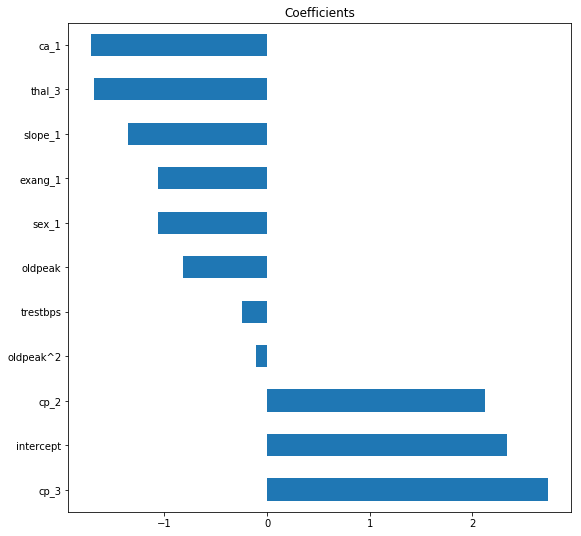

In [8]:
logis_reg = LogisticRegression(solver="lbfgs", C=1e10, max_iter=1000)
_ = evaluation(logis_reg, x_train_polynomial[features], y_train)

# Preprocessing testing dataset

In [9]:
x_numerical = std_scaler.transform(x_test[numerical_features])
x_numerical = pd.DataFrame(x_numerical, columns=numerical_features, dtype="float64")

In [10]:
x_categorical = encoder.transform(x_test[categorical_features])

# Get feature names
feature_names = encoder.get_feature_names(categorical_features)
# Remove dropped columns
feature_names = [feature_name for feature_name in encoder.get_feature_names(categorical_features) if "_0" not in feature_name]

x_categorical = pd.DataFrame(x_categorical.toarray(), columns=feature_names, dtype="int8")

In [11]:
x_test_processed = pd.concat([x_numerical, x_categorical], axis=1)

# Create polynomial features
x_test_polynomial = create_polynomial(x_test_processed[numerical_features], degree=2, interaction=False)
x_test_polynomial = pd.concat([x_test_processed, x_test_polynomial], axis=1)

In [12]:
acc = logis_reg.score(x_test_polynomial[features], y_test)
print("Test set accuracy: {:.2f}".format(acc * 100))

Test set accuracy: 80.33
